# Logistic Regression

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Set working directory
month_file = '5_September'

# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

In [2]:
# Load original dataset
dataset = pd.read_parquet('top_vs_ntop_player_ending_balance_by_session.parquet')

print(dataset.columns)

Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_maxbet', '#dec_maxbet', 'first_wager',
       'first_outcome', 'first_p/b', 'last_wager', 'last_outcome', 'last_p/b',
       '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 'w/g',
       'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws',
       '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt',
       '2ws/min', '3ws/min', '4ws/min', 'ave_time_per_gamble',
       'min_time_per_gamble', 'max_time_per_gamble', 'total_duration',
       'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
       'unique_machines', 'ave_time_

## Load Dataframes

In [3]:
# Filter Columns
filter = ['session_time', 'gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', '#W', '#L', '#NH', '#D',
        'w/min', 'l/min', '#2ws', '2ws_profit', '2ws_wgramt','2ws/min', 
        '#3ws', '3ws_profit', '3ws_wgramt', '3ws/min', '#4ws', '4ws_profit', '4ws_wgramt', '4ws/min', 
        'w/g', 'l/g', 'nh/g', 'd/g', 'ave_time_per_gamble', 
        'min_time_per_gamble', 'max_time_per_gamble', 'total_gambles', 'total_duration',
        'machines_changes', 'unique_machines', 'ave_time_per_machine', 'classification']

# Columns NOT INCLUDED
# 'playerkey', 'rank', 'age_range', '#W', '#L', '#NH', '#D', #2ws, #3ws, #4ws, 2ws_profit, 3ws_profit, 4ws_profit,
# 2ws_wgramt, 3ws_wgramt, 4ws_wgramt, ave_time_per_machine, 'total_duration', 'total_gambles'

# Load dataset
dataset = pd.read_parquet('top_vs_ntop_player_ending_balance_by_session.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Covert 'total_duration' and  to seconds
dataset['total_duration'] = dataset['total_duration'].dt.total_seconds()

# Convert 'ave_time_per_machine' to seconds
dataset['ave_time_per_machine'] = dataset['ave_time_per_machine'].dt.total_seconds()

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Taking Care of Missing Data

X[:, 3:31] it covers from beggining account balance to 4ws_wgramt column

We do not need this step since we do not have missing data!

In [4]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 3:31])
# X[:, 3:31] = imputer.transform(X[:, 3:31])

## Encoding Categorical Data

### Encoding the Independent Variable

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender and simplay
X[:, 0] = le.fit_transform(X[:, 0])

In [6]:
# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Encoding the Dependent Variable

In [7]:
y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 14:] = sc.fit_transform(X_train[:, 14:])
X_test[:, 14:] = sc.transform(X_test[:, 14:])

## Training the Logistic Regression model on 

1.   X_train
2.   y_train

the Training set

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

## Column Mapping

In [11]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'first_outcome', 3: 'first_wager', 4: 'first_p/b', 5: 'last_outcome', 6: 'last_wager', 7: 'last_p/b', 8: 'beginning_amt', 9: 'ending_amt', 10: 'ending_balance', 11: 'ave_slotdenom', 12: 'std_slotdenom', 13: 'min_slotdenom', 14: 'max_slotdenom', 15: 'ave_theo_payback', 16: 'min_theo_payback', 17: 'max_theo_payback', 18: 'ave_wageramt', 19: 'std_wageramt', 20: 'min_wager', 21: 'max_wager', 22: 'ave_p/b', 23: 'std_p/b', 24: 'max_p/b', 25: 'max_profit', 26: 'depletion_slope', 27: '#inc_slotdenom', 28: '#dec_slotdenom', 29: '#inc_maxbet', 30: '#dec_maxbet', 31: '#W', 32: '#L', 33: '#NH', 34: '#D', 35: 'w/min', 36: 'l/min', 37: '#2ws', 38: '2ws_profit', 39: '2ws_wgramt', 40: '2ws/min', 41: '#3ws', 42: '3ws_profit', 43: '3ws_wgramt', 44: '3ws/min', 45: '#4ws', 46: '4ws_profit', 47: '4ws_wgramt', 48: '4ws/min', 49: 'w/g', 50: 'l/g', 51: 'nh/g', 52: 'd/g', 53: 'ave_time_per_gamble', 54: 'min_time_per_gamble', 55: 'max_time_per_gamble', 56: 'total_gambles', 57: 'to

### Which IDVs have the most weight in the model

In [12]:
# Get the feature names after one-hot encoding
feature_names = ct.get_feature_names_out()

# Get the coefficients and feature importance
coefficients = classifier.coef_[0]
feature_importance = list(zip(feature_names, coefficients))

# Sort the feature importance by absolute coefficient values
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

remainder__x56: 2.5401985124842614
remainder__x54: -0.7094915705883944
remainder__x51: -0.6438768466449396
remainder__x52: -0.5491406939427371
remainder__x50: -0.5076839674234458
remainder__x32: 0.48999269567511844
remainder__x15: 0.4899044692810294
remainder__x43: 0.3636156796592189
encoder__x5_draw: 0.3420395607263972
remainder__x21: -0.3402858365637489
remainder__x25: -0.337045826662704
remainder__x35: 0.3314878679416616
remainder__x36: -0.32574936505096785
remainder__x57: -0.3129116279005662
remainder__x7: -0.3128236968252444
remainder__x38: -0.3031589867676944
remainder__x55: 0.2847188513889347
remainder__x33: 0.2706055274843761
remainder__x22: -0.25243560868682713
remainder__x19: 0.23281999068056972
remainder__x16: -0.22815256054060554
remainder__x23: 0.21466386717769406
remainder__x4: -0.2072802818790352
encoder__x5_gain: -0.19303265076995546
encoder__x2_gain: 0.19160142161361168
encoder__x1_Baby Boomers: 0.18864059097192656
encoder__x1_Gen Z: -0.18178732437101155
remainder__x39

In [13]:
from sklearn.inspection import permutation_importance

result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

remainder__x56: 0.085981098109811
remainder__x51: 0.004770477047704802
remainder__x52: 0.0032853285328533154
remainder__x32: 0.0021264626462646707
remainder__x50: 0.0019914491449145146
remainder__x57: 0.0018451845184518812
remainder__x15: 0.001788928892889341
remainder__x55: 0.0016314131413141864
remainder__x20: 0.0012601260126013035
remainder__x21: 0.0010801080108011063
remainder__x43: 0.0010801080108011063
remainder__x36: 0.0009675967596760038
remainder__x22: 0.0008325832583258696
remainder__x30: 0.0008100810081008491
remainder__x18: 0.0005738073807381227
remainder__x19: 0.0005513051305131023
remainder__x41: 0.0005513051305131023
remainder__x16: 0.0005288028802880928
remainder__x25: 0.0004500450045005211
remainder__x29: 0.00045004500450051
remainder__x35: 0.00045004500450051
remainder__x44: 0.00045004500450051
remainder__x39: 0.00041629162916297926
encoder__x5_loss: 0.00040504050405046896
remainder__x49: 0.0004050405040504579
remainder__x6: 0.00030378037803786563
remainder__x4: 0.000

### Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix and Accuracy Score

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro', zero_division=1))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[1963   32]
 [  74  154]]
Accuracy:  0.9523166891587944
Precision:  0.8958145280060811
Recall:  0.8296992481203007
F1 Score:  0.8588358350586611


## Cumulative Accuracy Profile (CAP) Graph

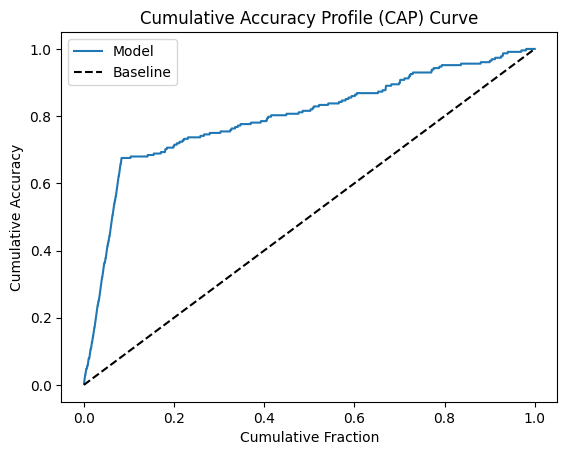

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()